### Package import

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Import data

In [2]:
data_set = pd.read_csv("../datasets/raw/market_insights_overview_all_2021_11_12.csv")
categories = pd.read_csv("../datasets/raw/solr_categories_2021_11_29.csv")

In [3]:
data_set["date"] = pd.to_datetime(data_set["date"])

## Raw data

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35966868 entries, 0 to 35966867
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   product_id       int64         
 2   manufacturer_id  int64         
 3   cat_id           int64         
 4   root_cat_id      int64         
 5   date             datetime64[ns]
 6   hits             int64         
 7   clicks           int64         
 8   last_modified    object        
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 2.4+ GB


In [5]:
data_set.head()

,id,product_id,manufacturer_id,cat_id,root_cat_id,date,hits,clicks,last_modified
0,12871556,343773,21,51,128,2019-09-16,492,162,2019-09-17 05:05:46.261642
1,12871557,354639,564,11054,11750,2019-09-16,443,9,2019-09-17 05:05:46.261642
2,12871558,321019,6522,11458,11750,2019-09-16,396,107,2019-09-17 05:05:46.261642
3,12871559,363342,21,19,117,2019-09-16,312,50,2019-09-17 05:05:46.261642
4,12871560,316344,168,19,117,2019-09-16,293,53,2019-09-17 05:05:46.261642


## Category data

In [6]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   parent             2136 non-null   object
 1   title_no           2136 non-null   object
 2   internal_doc_type  2136 non-null   object
 3   image_url          2136 non-null   object
 4   description        2114 non-null   object
 5   title              2136 non-null   object
 6   title_phonetic     2136 non-null   object
 7   url                2136 non-null   object
 8   tags               2136 non-null   object
 9   path               2136 non-null   object
 10  _version_          2136 non-null   int64 
 11  internal_doc_id    2136 non-null   int64 
 12  popularity         2136 non-null   int64 
 13  root               2136 non-null   object
 14  alias              841 non-null    object
 15  title_edge_ngram   2136 non-null   object
 16  id                 2136 non-null   int64 


In [7]:
categories.head()

,parent,title_no,internal_doc_type,image_url,description,title,title_phonetic,url,tags,path,...,internal_doc_id,popularity,root,alias,title_edge_ngram,id,alias_no,adult,last_modified,parents
0,Vannsport,Vannski,category,/3131/3131139/da3b0f02940b4bf2a6831a4a2113fdc7...,1 produkter,Vannski,Vannski,/kategorier/vannski,products,Sport og friluftsliv>Sportsutstyr>Vannsport>Va...,...,13053,1004,Sport og friluftsliv,water ski,Vannski,13053,water ski,False,2021-11-29T04:01:40.783Z,"Sport og friluftsliv,Sportsutstyr,Vannsport"
1,Sportsutstyr,Vannsport,category,/1698/1698422/original.36x75!m.jpg,870 produkter,Vannsport,Vannsport,/kategorier/vannsport,categories,Sport og friluftsliv>Sportsutstyr>Vannsport,...,10065,4000,Sport og friluftsliv,NaN,Vannsport,10065,NaN,False,2021-11-29T04:01:40.783Z,"Sport og friluftsliv,Sportsutstyr"
2,Hagearbeid,Vannspreder,category,/1705/1705821/original.132x75!m.jpg,35 produkter,Vannspreder,Vannspreder,/kategorier/vannspreder,products,Hage og utemiljø>Hagearbeid>Vannspreder,...,11661,1046,Hage og utemiljø,spreder,Vannspreder,11661,spreder,False,2021-11-29T04:01:40.783Z,"Hage og utemiljø,Hagearbeid"
3,Hansker og votter,Vanter,category,/3071/3071632/original.68x75!m.jpg,758 produkter,Vanter,Vanter,/kategorier/vanter,filter,Klær og sko>Accessories og tilbehør>Hansker og...,...,12811,5897,Klær og sko,NaN,Vanter,12811,NaN,False,2021-11-29T04:01:40.783Z,"Klær og sko,Accessories og tilbehør,Hansker og..."
4,Tilhenger,Varehenger,category,/3154/3154296/i.192x75!m.jpg,99 produkter,Varehenger,Varehenger,/kategorier/varehenger,filter,Bilutstyr>Tilhenger>Varehenger,...,13209,1469,Bilutstyr,NaN,Varehenger,13209,NaN,False,2021-11-29T04:01:40.783Z,"Bilutstyr,Tilhenger"


### Check for NaN values

In [8]:
data_set.isnull().sum()

id                 0
product_id         0
manufacturer_id    0
cat_id             0
root_cat_id        0
date               0
hits               0
clicks             0
last_modified      0
dtype: int64

## Merge data

In [17]:
category_names = categories[["internal_doc_id", "title"]]

In [18]:
# Join with category names
grouped_joined= pd.merge(grouped, category_names, how="left", left_on=["cat_id"], right_on=["internal_doc_id"])
grouped_joined.rename(columns={"title": "cat_name"}, inplace=True)
grouped_joined.drop(columns=["internal_doc_id"], inplace=True, axis=1)

NameError: name 'grouped' is not defined

### Check for correlaction
Start with auto correlcation

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

c:\users\sander\documents\school\masteroppgave\env\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [16]:
# Select relevant data
correlation_data = data_set[['date', 'hits', 'cat_id']].set_index(['date'])
correlation_data = correlation_data.pivot(index=["date"], columns=["cat_id"])

KeyError: "None of ['date'] are in the columns"

In [ ]:
# Calculate ACF (via statsmodel)
plot_acf(correlcation_data, lags=50)
plt.show()

## Partial autocorrelation

In [ ]:
plot_pacf(correlcation_data, lags=50)
plt.show()

## Correlation matrix

In [13]:
correlation_data_corr = correlation_data.corr(min_periods=100)

<AxesSubplot:>

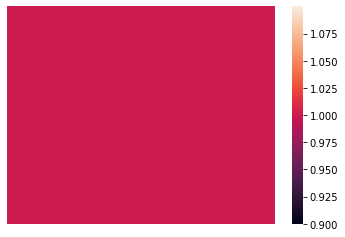

In [14]:
sns.heatmap(correlation_data_corr, xticklabels=False, yticklabels=False, cbar=True)


In [15]:
correlation_data_corr

,hits
hits,1.0


### TODO:
- Auto correlation
- Correlation matrix
- Find correlating datasets

- Find time series with low correlation
- Time series that should not be correlated

- Find series with high seasonality or extreme values
- Find series with no or little seasonality